<a id="start"></a>
# Анализ рынка видеоигр

### Цель исследования:
* Выявление закономерностей, определяющих успех видеоигры.
* Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.
* Определить портрет пользователя каждого региона.

### Содержание:

* [Загрузка данных](#part1)
* [Предобработка данных](#part2)
* [Исследовательский анализ данных](#part3)
    * [Количество игр по годам](#part3-1)
    * [Продажи по платформам](#part3-2)
    * [Актуальный период](#part3-3)
    * [Анализ продаж](#part3-4)
    * [Влияние отзывов игроков и критиков](#part3-5)
    * [Распределение по жанрам](#part3-6)
* [Портреты пользователей по регионам](#part4)
    * [Самые популярные платформы и жанры](#part4-1)
    * [Влияние рейтинга ESRB на продажи](#part4-2)
* [Проверка Гипотез](#part5)
    * [Рейтинги XOne и PC](#part5-1)
    * [Рейтинги Action и Sports](#part5-2)
* [Выводы](#part6)

<a id="part1"></a>
## Загрузка данных и знакомство с данными


In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
display(games.head(10))
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Проверяю пропуски на подозрительных столбцах
print('Год релиза - пропусков:')
display(games['Year_of_Release'].isna().sum())
print('Оценка критиков - пропусков:')
display(games['Critic_Score'].isna().sum())
print('Оценка игроков - пропусков:')
display(games['User_Score'].isna().sum())
print('Возрастной рейтинг - пропусков:')
display(games['Rating'].isna().sum())

Год релиза - пропусков:


269

Оценка критиков - пропусков:


8578

Оценка игроков - пропусков:


6701

Возрастной рейтинг - пропусков:


6766

Данные требуют корректировки:
* Тип данных неверный в некоторых столбцах. Возможно, это скрытые пропуски.
* Пропусков в столбце с годом релиза немного, их можно удалить. В столбцах с оценками и рейтингом пропусков очень много, их трогать не буду. Их наличие вероятно связанно с тем, что многие игры выпущенны до появления системы возрастной оценки (Ее создали во второй половине девяностых под воздействием общественности, обеспокоенной влиянием жестоких игр), а оценок критиков и пользователей нет для малоизвестных игр или они не выгрузились с агрегатора.
* Нужно привести названия столбцов в более удобный вид.
* Требуется проверить данные на дубликаты

<a id="part2"></a>
## Предобработка данных

Исправляю названия столбцов

In [5]:
games.columns = games.columns.str.lower()

Проверка на явные дубликаты

In [6]:
display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'])])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [7]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'])])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Год релиза - удаляю пропуски и привожу к нужному типу

In [8]:
temp = games.copy() # создаем копию датасета до преобразования
len(temp)

16713

In [9]:
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype('int')
#display(games['year_of_release'].unique())

In [10]:
a, b = len(temp), len(games)
print(a, b, round((a-b)/a*100, 2))

16713 16444 1.61


Проверяю на скрытые пропуски и дубликаты

In [11]:
print('genre:')
display(games['genre'].unique())
print('platform:')
display(games['platform'].unique())
print('critic_score:')
display(games['critic_score'].unique())
print('user_score:')
display(games['user_score'].unique())
print('rating:')
display(games['rating'].unique())

#display(games['critic_score'].value_counts())


genre:


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

platform:


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

critic_score:


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

user_score:


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

rating:


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

</font><font color='Blue'><b><b>Изменил пункт</b></font><br>

* Оценки критиков имеют слишком много пропусков - решено оставить как есть. Это может быть связанно с тем, что критики выпускают рецензии на малоизвестные и низкобюджетные игры так как это им не выгодно.
* Оценки пользователей имеют скрытый текстовы пропуск - его удалим чтобы он не мешал при анализе данных и построении графиков. По этой же причине приведу рейтинг пользователей в численный формат.
* Рейтинг игр:
    * Имеются скрытые дубликаты - названия возрастных цензов, которые использовались раньше. Это EC и K-A (сейчас все они E)
    * Имеются скрытые пропуски - RP означает что рейтинга у игры на данный момент нет.
    * Очень много пропусков, однако это объясняется тем, что ESRB основанна в середине 90-х, и все игры до этого момента не имеют ее оценок, ко всему прочему это Американская организация, и она может не оценивать игры, которые, к примеру, предназначенны только для рынка Японии. Поэтому пропуски оставляем.

In [12]:

temp = games.copy() # создаем копию датасета до преобразования
len(temp)

16444

In [ ]:
# Удаляем пропуски у жанров
games = games.dropna(subset=['genre'])

#Удаляю скрытый пропуск и меняю тип данных в оценках игроков
games.user_score.replace('tbd', np.nan, inplace=True)
games['user_score'] = games['user_score'].astype('float')

In [14]:

a, b = len(temp), len(games)
print(a, b, round((a-b)/a*100, 2))

16444 16443 0.01


Проверяю пропуски в названии игр

In [15]:
display(games[games['name'].isna()])
games = games.dropna(subset=['name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь посчитаю суммарные продажи во всех регионах

In [16]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


In [17]:
# Исправляем дубликаты и пропуски в рейтинге
games.loc[games['rating'] == 'EC', 'rating'] = 'E'
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'
games.loc[games['rating'] == 'RP', 'rating'] = 'no_rating'
games['rating'] = games['rating'].fillna('no_rating')

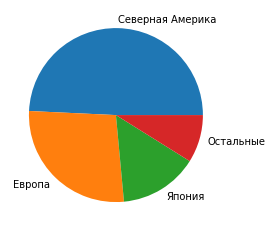

In [18]:
sales = games.agg('sum')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
labels_sales = ['Северная Америка','Европа','Япония','Остальные']
fig1, ax = plt.subplots()
ax.pie(sales, labels=labels_sales)
plt.show()

В Северной Америке продается чуть менее половины всех видеоигр. И около трети в Европе. В Японии продают игр почти столько же, сколько и во всех прочих странах.

In [19]:
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<a id="part3"></a>
## Исследовательский анализ данных

<a id="part3-1"></a>
### Количество игр по годам

In [20]:
games_per_year = games.pivot_table(index = 'platform', columns = 'year_of_release', values = 'name', aggfunc='count', fill_value=0).reset_index()
display(games_per_year)

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,2600,9,46,36,11,1,1,2,6,2,...,0,0,0,0,0,0,0,0,0,0
1,3DO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3DS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,116,93,91,80,86,46
3,DC,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,DS,0,0,0,0,0,1,0,0,0,...,376,492,403,323,153,23,8,0,0,0
5,GB,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,GBA,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
7,GC,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
8,GEN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,GG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


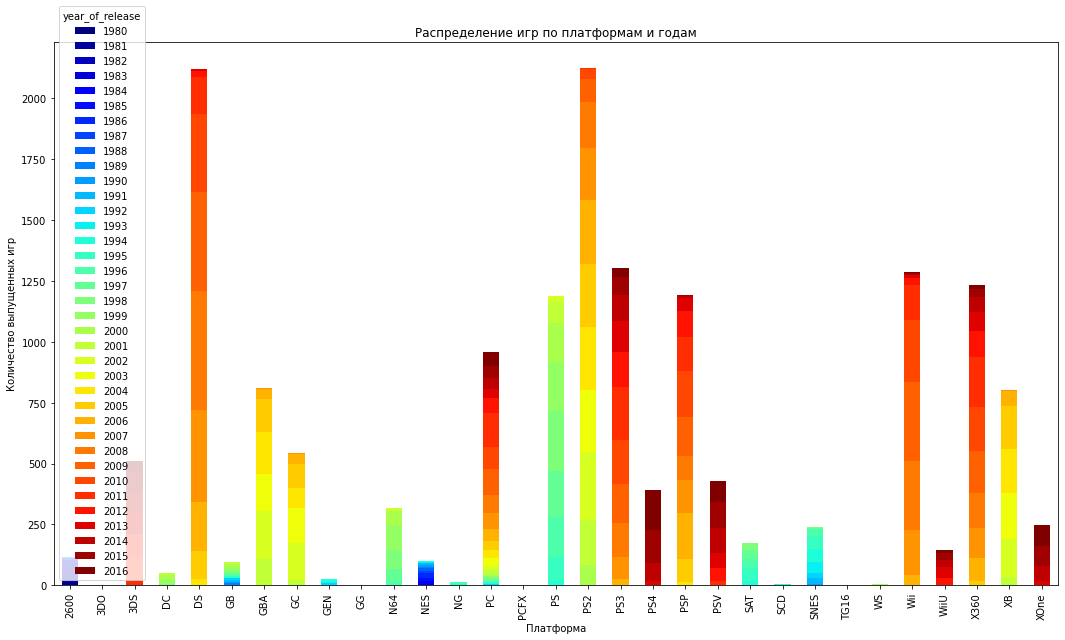

In [21]:
#jupyter плохо отображает широкие таблицы, построю график

games_per_year2 = games.pivot_table(index='platform',columns='year_of_release',values='name',aggfunc='count')

fig, ax = plt.subplots(figsize=(18, 10))

games_per_year2.plot(kind='bar',stacked=True, ax=ax, cmap="jet")
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Распределение игр по платформам и годам')

plt.show()


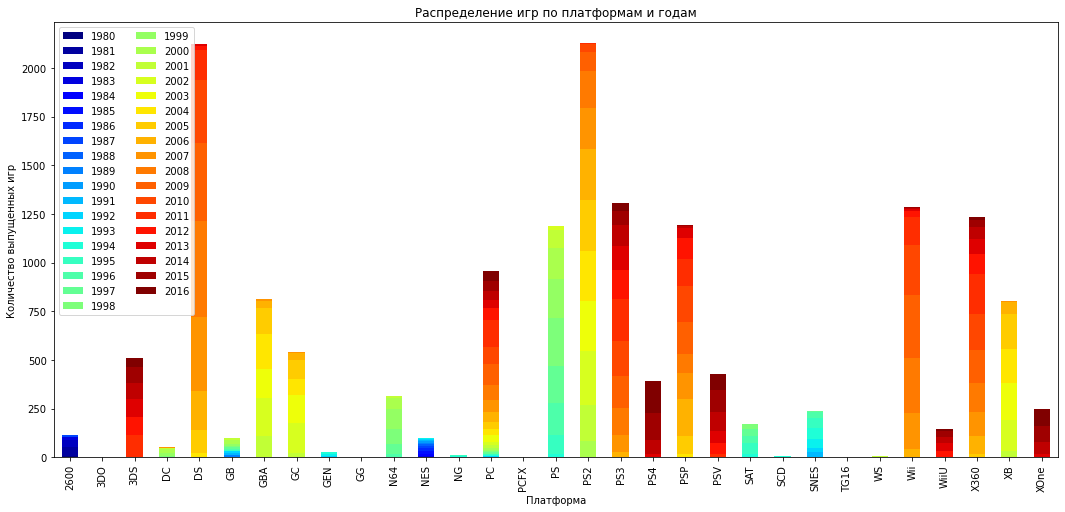

In [22]:
games_per_year2 = games.pivot_table(index='platform',columns='year_of_release',
                                    values='name',aggfunc='count')
fig, ax = plt.subplots(figsize=(18, 8))

games_per_year2.plot(kind='bar',stacked=True, ax=ax, cmap="jet")
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Распределение игр по платформам и годам')
plt.legend(bbox_to_anchor=[0, 1], loc='upper left', ncol=2)
plt.show()

На графике хорошо видно какие платформы сильно устарели и неинтересны нам. А самые популярные у игроделов платформы это PS2 и DS. На графике хорошо можно увидеть какие платформы только наращивают популярность (бордового цвета в них больше чем других цветов), а какие уже давно устарели или начали устаревать (темно-красные цвета в малом количестве или отсутствуют). Есть тут одна особенная платформа - ПК. Видно что ее пик был в 2011 году, однако остальные сегменты не уменьшаются. Это означает, что данная платформа не теряет своей актуальности многие годы. А всплеск 2011-го года может быть связан с большими продажами игр в целом в этот год. Чтобы это проверить, попробуем повернуть график.

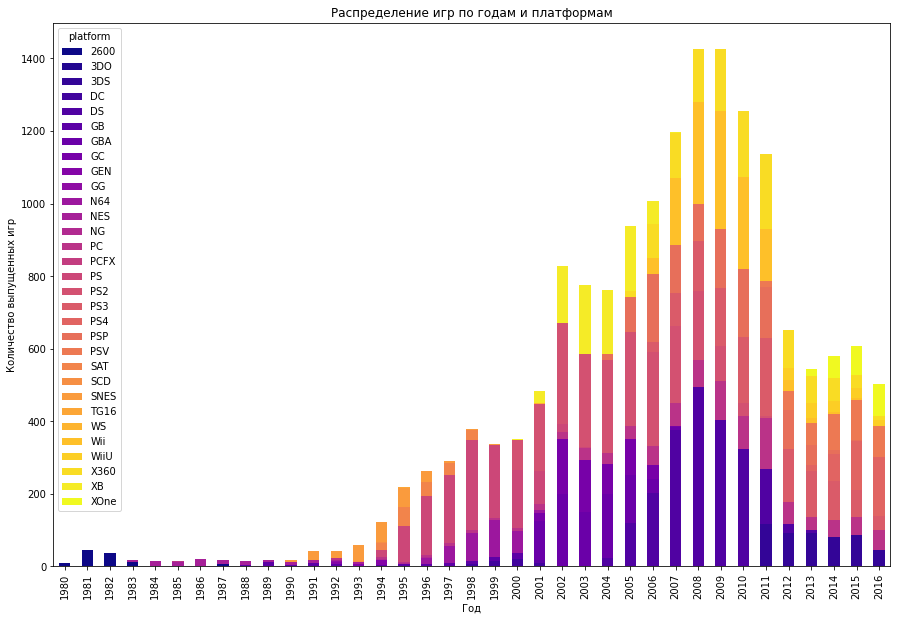

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))

games_per_year2.T.plot(kind='bar',stacked=True, ax=ax, cmap="plasma")
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Распределение игр по годам и платформам')

plt.show()


Больше всего игр выходило с 2002 года по 2012, по всей видимости на актуальные консоли восьмого поколения игры начали делать не так давно, поэтому и их количество резко падает. График подтверждает гипотезу каксаемо актуальности PC. Спад продаж в 2016 году можно объяснить неполнотой данных.

<a id="part3-2"></a>
### Продажи по платформам

In [24]:

platform_pivot = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales',ascending=False)
display(platform_pivot.head(8))

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88


In [25]:
data_sum_sales = games.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').fillna(0)[['PS2', 'X360','PS3','Wii', 'DS', 'PS4', 'PS','XB']].reset_index()
data_sum_sales = data_sum_sales.query('year_of_release > 1993')
display(data_sum_sales)

platform,year_of_release,PS2,X360,PS3,Wii,DS,PS4,PS,XB
14,1994,0.00,0.00,0.00,0.00,0.00,0.00,6.03,0.00
15,1995,0.00,0.00,0.00,0.00,0.00,0.00,35.96,0.00
16,1996,0.00,0.00,0.00,0.00,0.00,0.00,94.70,0.00
17,1997,0.00,0.00,0.00,0.00,0.00,0.00,136.17,0.00
18,1998,0.00,0.00,0.00,0.00,0.00,0.00,169.49,0.00
19,1999,0.00,0.00,0.00,0.00,0.00,0.00,144.53,0.00
20,2000,39.17,0.00,0.00,0.00,0.00,0.00,96.37,0.99
21,2001,166.43,0.00,0.00,0.00,0.00,0.00,35.59,22.26
22,2002,205.38,0.00,0.00,0.00,0.00,0.00,6.67,48.01
23,2003,184.31,0.00,0.00,0.00,0.00,0.00,2.07,55.04


Характерный срок появления и исчезновения платформ - 10 лет. Причем, новые генерации консолей выходят примерно каждые 7 лет. 3 года, в которые они пересекаются, продаж меньше, так как разработчики уже перестают делать игры для старых платформ а для новых разработка только начинается (хорошо видно на примере PS-PS2).

In [26]:
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

<a id="part3-3"></a>
###  Актуальный период

Наша задача - построить прогноз продаж на 2017 год. Анализируя все, что мы изучили в предыдущих пунктах выберем актуальный период. <br>
Самый прибылный период по продажам игр в цикле жизни одной консоли это с третьего по седьмой год. По графикам выше мы видим, что как раз три года назад появилось восьмое поколение консолей (ps4, XOne), на нем и целесообразнее сконцентрироваться в первую очередь. Также стоит обратить внимание на все еще актуальные консоли 3DS, PSV и Wii U их ожидает спад продаж, но до него еще точно больше года. Не стоит забывать и про PC - Персональные компьютеры не теряют своей актуальности с начала 90-х годов.
<br> <br>
**Выводы:**
<br> <br>
Актуальным периодом, для построения прогноза на 2017 год, будем считать 2012-2016 годы.

In [27]:
#Отсечем неактуальные данные
games_actual = games.query('year_of_release >= 2012')# & platform in ["PS4", "XOne", "WiiU", "3DS", "PSV", "PC"]')
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


<a id="part3-4"></a>
###  Анализ продаж

Продажи каких платформ растут?

In [28]:
games_sales_actual = games_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').reset_index()
display(games_sales_actual.head())

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
1,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
4,2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


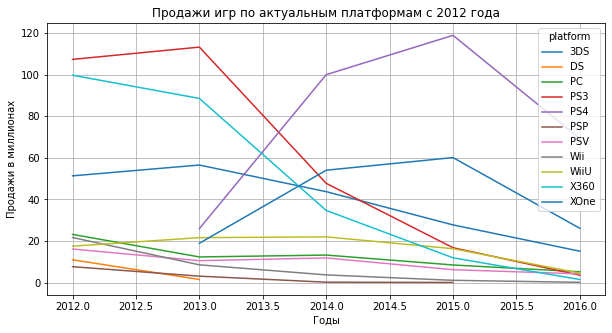

In [29]:
ax = games_sales_actual.plot('year_of_release',figsize=(10,5))
#plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ylab = ax.set_ylabel('Продажи в миллионах')
xlab = ax.set_xlabel('Годы')
plt.title('Продажи игр по актуальным платформам с 2012 года')
plt.grid()
plt.show()   

График полностью подтверждает выводы в предыдущем пункте. Самые потенциально прибыльные платформы это PS4 и Xbox One. Теперь построим другой график.

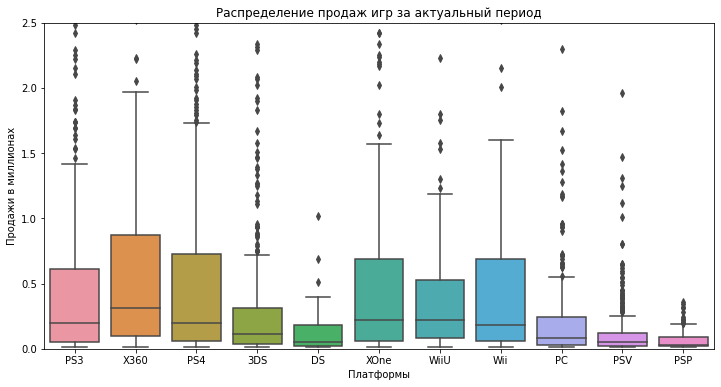

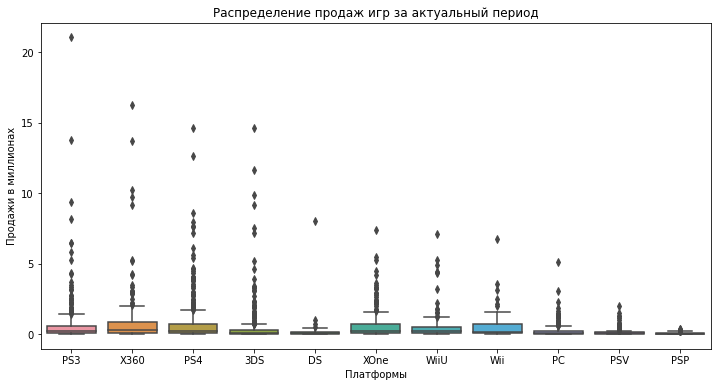

In [30]:
plt.figure(figsize=(12,6))

ax = sns.boxplot(x='platform', y='total_sales', data=games_actual)
ax.set_ylim(0, 2.5)
ax.set_ylabel('Продажи в миллионах')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр за актуальный период')
plt.show()

plt.figure(figsize=(12,6))
ax = sns.boxplot(x='platform', y='total_sales', data=games_actual)
ax.set_ylabel('Продажи в миллионах')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр за актуальный период')
plt.show()

Предыдуще поколение консолей (PS3, Xbox360, Wii) показывает хорошие продажи но это всё, как мы уже знаем, за счет продаж в закат поколения (в данном случае 2012 и 2013 год) когда выходит много хороших игр, разрабатываемых последние несколько лет на уходящие консоли а новые  еще не вышли. Я рекомендую делать ставку на новые платфомы, а из них лучше всего смотрятся PS4 и XOne.

In [31]:
top_sales = games_actual.sort_values('total_sales', ascending=False)
display(top_sales.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


Гипотеза верна - 8 из 15 топ игр по продажам это эксклюзивы консолей или конкретных платформ.

<a id="part3-5"></a>
### Влияние отзывов игроков и критиков

На примере PS4 узнаем как влияют оценки игроков и критиков на продажи игр.

In [32]:
PS4_scores_sales = games_actual.query('platform=="PS4"').loc[:,['total_sales', 'critic_score', 'user_score']]
#PS4_scores_sales.head()
PS4_scores_rus = games_actual.query('platform=="PS4"').loc[:,['total_sales', 'critic_score', 'user_score']]

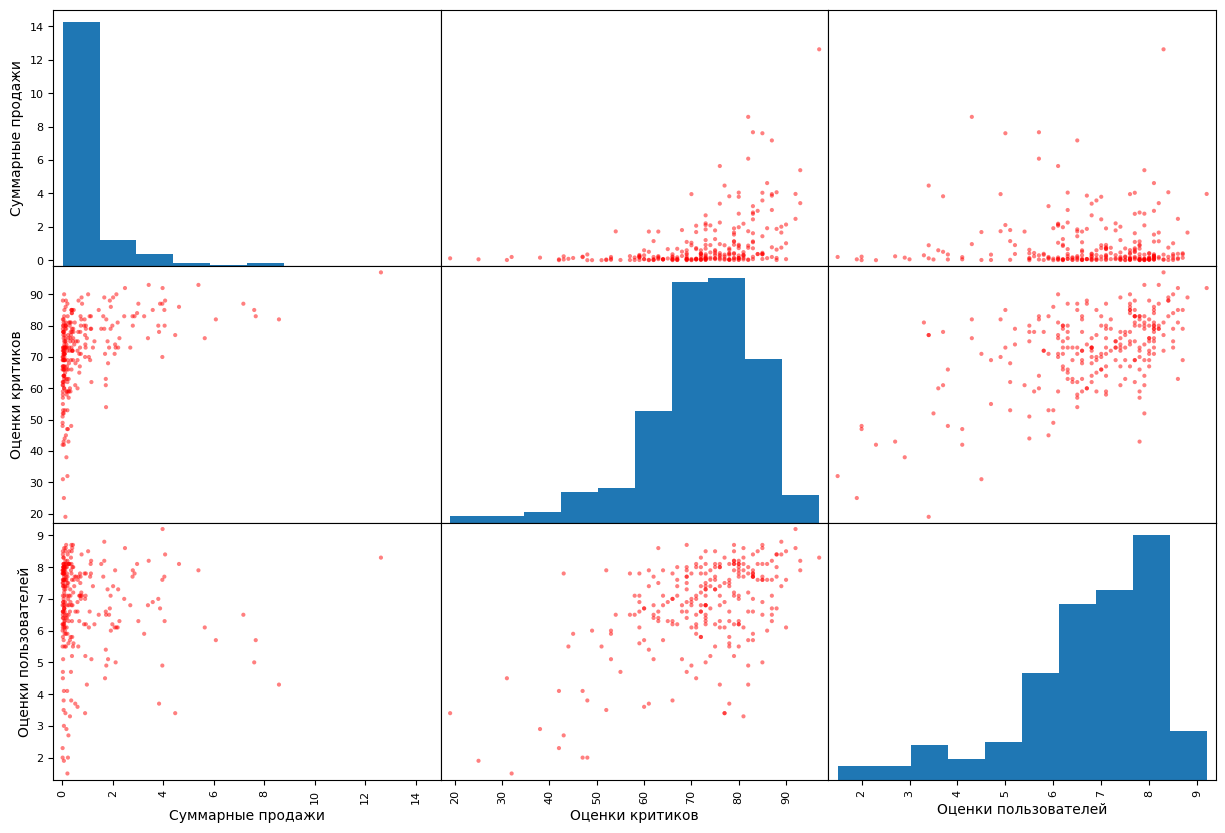

,Суммарные продажи,Оценки критиков,Оценки пользователей
Суммарные продажи,1.000000,0.406568,-0.031957
Оценки критиков,0.406568,1.000000,0.557654
Оценки пользователей,-0.031957,0.557654,1.000000


<Figure size 640x480 with 0 Axes>

In [33]:
PS4_scores_rus.rename(columns = {'total_sales':'Суммарные продажи', 'critic_score':'Оценки критиков','user_score':'Оценки пользователей'}, inplace = True)
plt.style.use('default')
pd.plotting.scatter_matrix(PS4_scores_rus, figsize=(15, 10), color='red')
plt.show();
plt.suptitle('Корреляция продаж и оценок PS4')
PS4_scores_rus.corr()

</font><font color='Blue'><b>Добавил большие диаграммы</b></font><br>

Text(0.5, 1.0, 'Оценки критиков и оценки игроков для PS4')

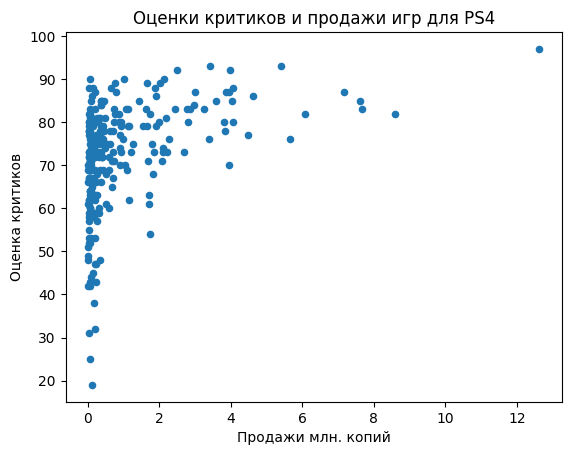

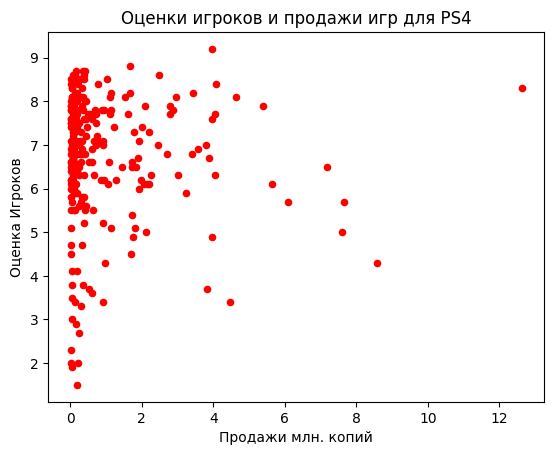

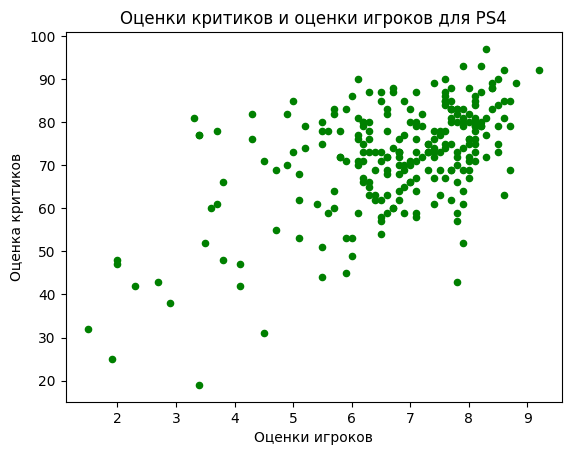

In [34]:
PS4_scores_sales.plot(x='total_sales', y='critic_score', kind='scatter')
plt.ylabel('Оценка критиков')
plt.xlabel('Продажи млн. копий')
plt.title('Оценки критиков и продажи игр для PS4')

PS4_scores_sales.plot(x='total_sales', y='user_score', kind='scatter', color='red')
plt.ylabel('Оценка Игроков')
plt.xlabel('Продажи млн. копий')
plt.title('Оценки игроков и продажи игр для PS4')

PS4_scores_sales.plot(x='user_score', y='critic_score', kind='scatter', color='green')
plt.ylabel('Оценка критиков')
plt.xlabel('Оценки игроков')
plt.title('Оценки критиков и оценки игроков для PS4')

Оценки критиков немного коррелируют с продажами игры (40%), в отличии от оценок игроков, которые никак не связанны с продажами. Я бы не удтверждал, что именно оценки критиков сильно влияют на продажи. Как правило, издатели игр дают критикам ознакомиться с игрой до ее официального релиза, поэтому им проще "предугадать" бестселлер и похвалить его, чтобы не портить отношения с издателями, дающими бесплатно оценивать игры до релиза (этим критики и зарабатывают). А вот игроки сначала покупают игру а только потом уже оценивают - их оценка никак не влияет на покупку ведь игра уже куплена, даже если она не понравилась. Так можно объяснить такой большой разброс между оценками игроков и оценками критиков. Проверим эту теорию на других платформах:

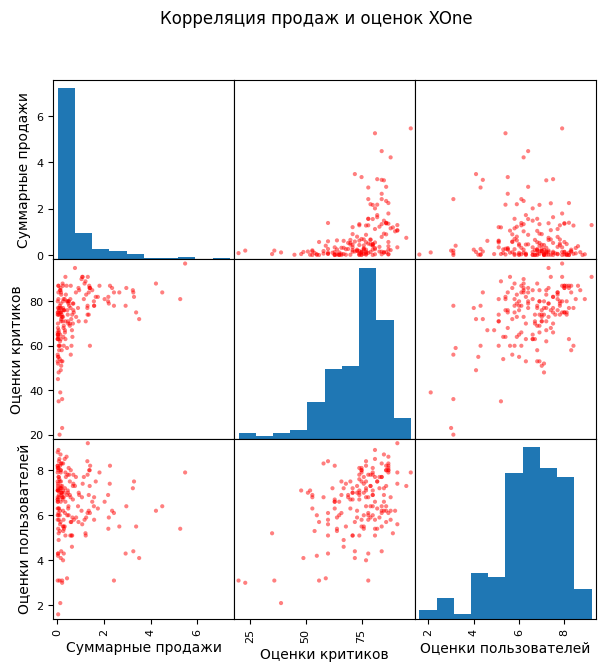

Корреляция для XOne


,Суммарные продажи,Оценки критиков,Оценки пользователей
Суммарные продажи,1.000000,0.416998,-0.068925
Оценки критиков,0.416998,1.000000,0.472462
Оценки пользователей,-0.068925,0.472462,1.000000


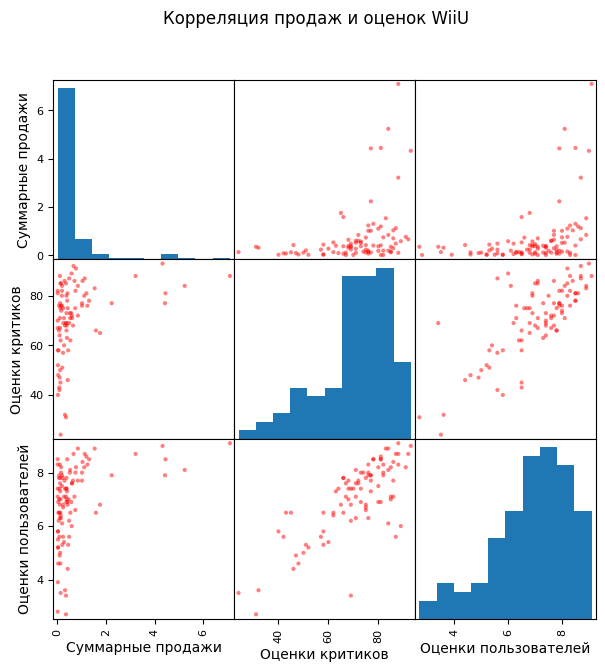

Корреляция для WiiU


,Суммарные продажи,Оценки критиков,Оценки пользователей
Суммарные продажи,1.000000,0.34838,0.400219
Оценки критиков,0.348380,1.00000,0.770080
Оценки пользователей,0.400219,0.77008,1.000000


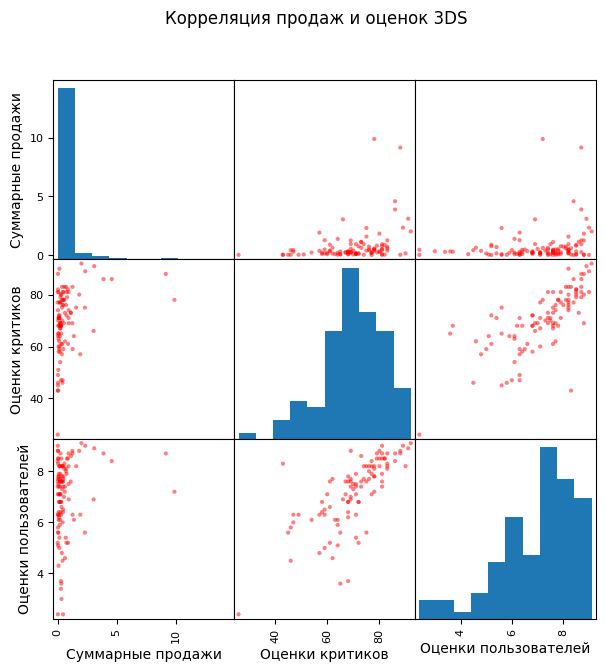

Корреляция для 3DS


,Суммарные продажи,Оценки критиков,Оценки пользователей
Суммарные продажи,1.000000,0.320803,0.197583
Оценки критиков,0.320803,1.000000,0.722762
Оценки пользователей,0.197583,0.722762,1.000000


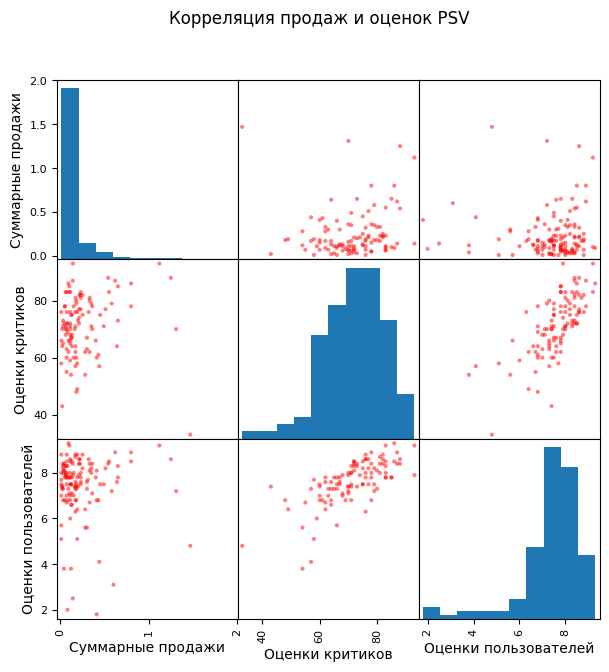

Корреляция для PSV


,Суммарные продажи,Оценки критиков,Оценки пользователей
Суммарные продажи,1.000000,0.094488,-0.004339
Оценки критиков,0.094488,1.000000,0.699199
Оценки пользователей,-0.004339,0.699199,1.000000


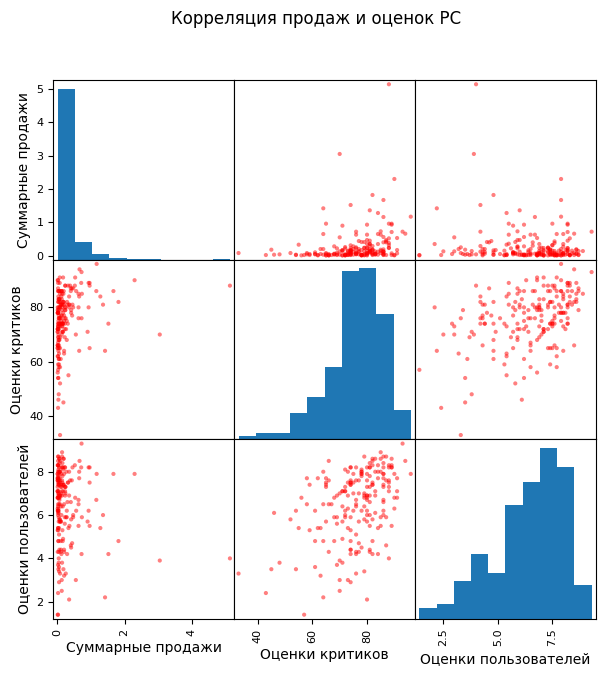

Корреляция для PC


,Суммарные продажи,Оценки критиков,Оценки пользователей
Суммарные продажи,1.000000,0.237243,-0.121867
Оценки критиков,0.237243,1.000000,0.432587
Оценки пользователей,-0.121867,0.432587,1.000000


In [35]:
platforms = ["XOne", "WiiU", "3DS", "PSV", "PC"]
for platform in platforms:
    sales_matrix = games_actual.query('platform==@platform').loc[:,['total_sales', 'critic_score', 'user_score']]
    sales_matrix.rename(columns = {'total_sales':'Суммарные продажи', 'critic_score':'Оценки критиков','user_score':'Оценки пользователей'}, inplace = True)
    plt.style.use('default')
    pd.plotting.scatter_matrix(sales_matrix, figsize=(7, 7), color='red');
    plt.suptitle('Корреляция продаж и оценок ' + platform)
    plt.show();
    print(f'Корреляция для {platform}')
    display(sales_matrix.corr())
    

Какие наблюдаются отличия у других платформ:
* У Xbox ONE картина схожа с PS4.
* У WII U и PSV очень похожие между собой оценки игроков и критиков.
* На PSV отзывы игроков сильнее связанны с продажами чем отзывы критиков.
* На Персональных компьютерах взаимосвязь оценок критиков и продаж в два раза слабее чем на PS4.

Расчет по Платформе 3DS


user_score     0.197583
total_sales    1.000000
Name: total_sales, dtype: float64

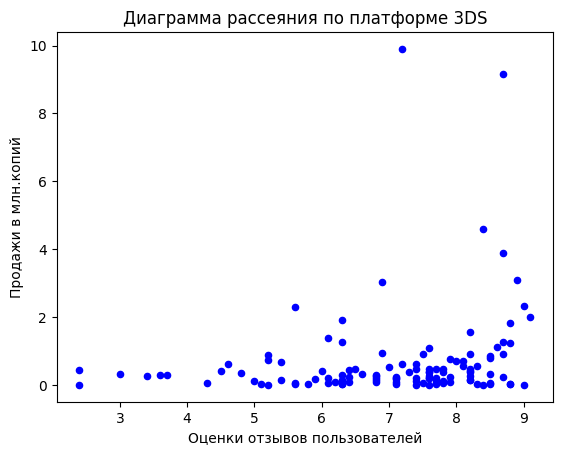

critic_score    0.320803
total_sales     1.000000
Name: total_sales, dtype: float64

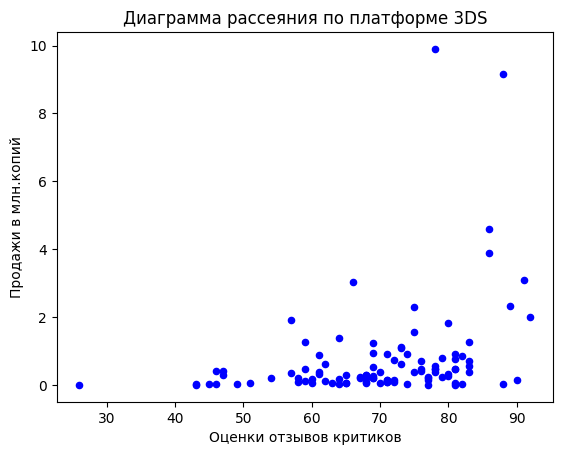

Расчет по Платформе DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PC


user_score    -0.121867
total_sales    1.000000
Name: total_sales, dtype: float64

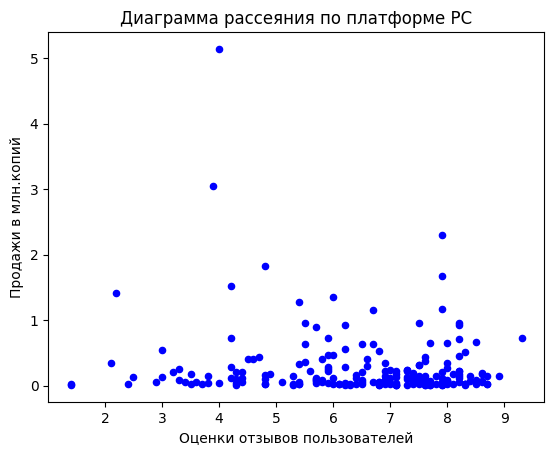

critic_score    0.237243
total_sales     1.000000
Name: total_sales, dtype: float64

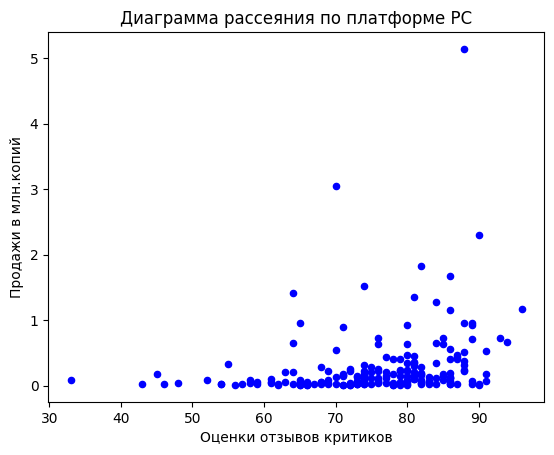

Расчет по Платформе PS3


user_score    -0.006206
total_sales    1.000000
Name: total_sales, dtype: float64

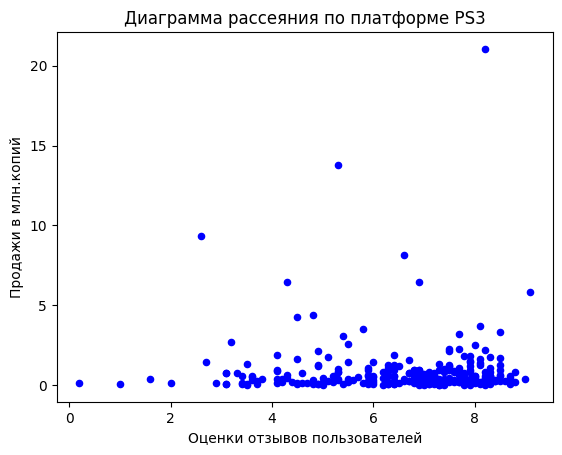

critic_score    0.334152
total_sales     1.000000
Name: total_sales, dtype: float64

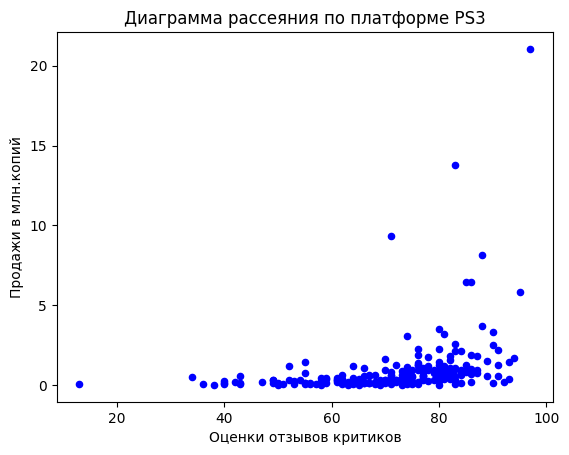

Расчет по Платформе PS4


user_score    -0.031957
total_sales    1.000000
Name: total_sales, dtype: float64

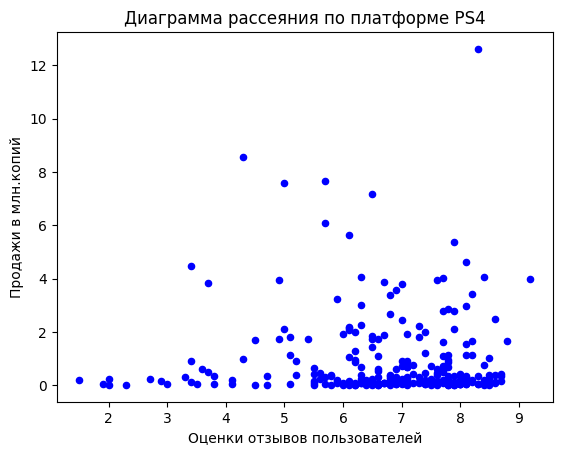

critic_score    0.406568
total_sales     1.000000
Name: total_sales, dtype: float64

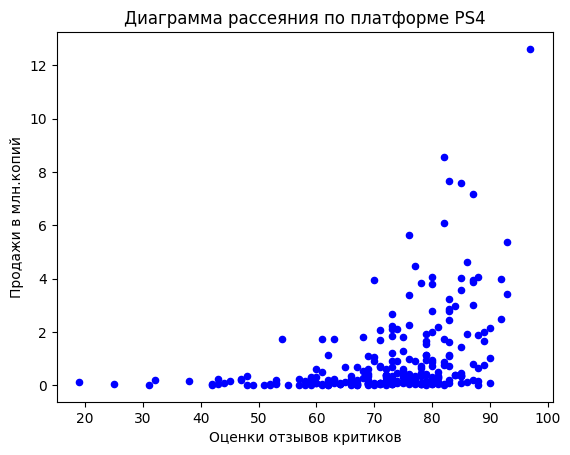

Расчет по Платформе PSP


user_score    -0.802302
total_sales    1.000000
Name: total_sales, dtype: float64

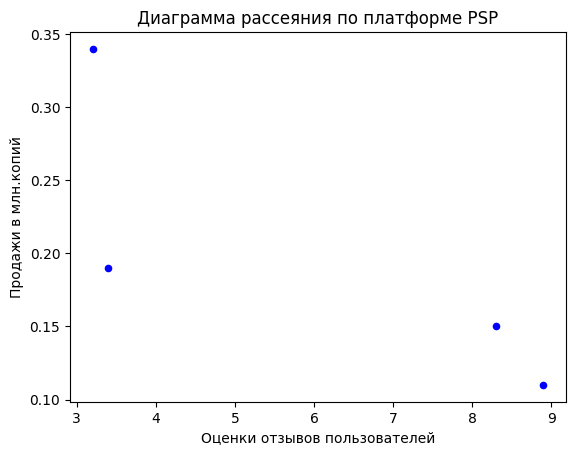

Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score    -0.004339
total_sales    1.000000
Name: total_sales, dtype: float64

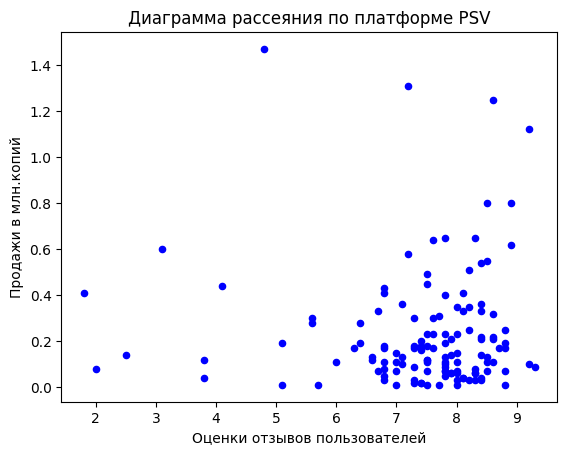

critic_score    0.094488
total_sales     1.000000
Name: total_sales, dtype: float64

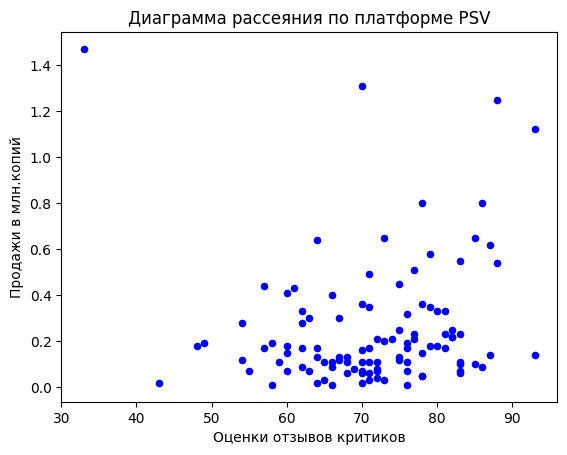

Расчет по Платформе Wii


user_score     0.296197
total_sales    1.000000
Name: total_sales, dtype: float64

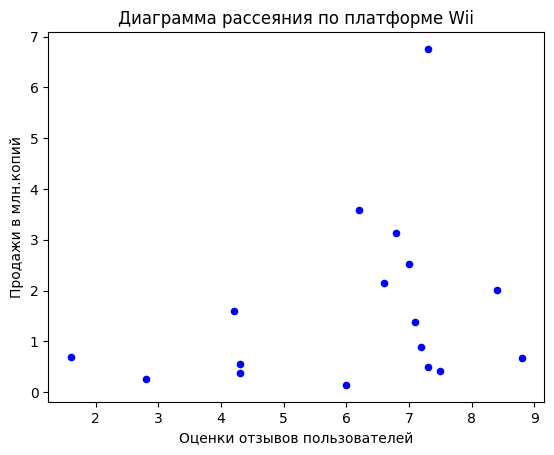

critic_score   -0.424341
total_sales     1.000000
Name: total_sales, dtype: float64

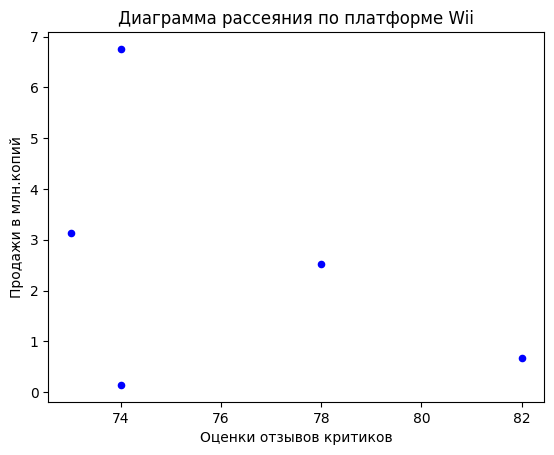

Расчет по Платформе WiiU


user_score     0.400219
total_sales    1.000000
Name: total_sales, dtype: float64

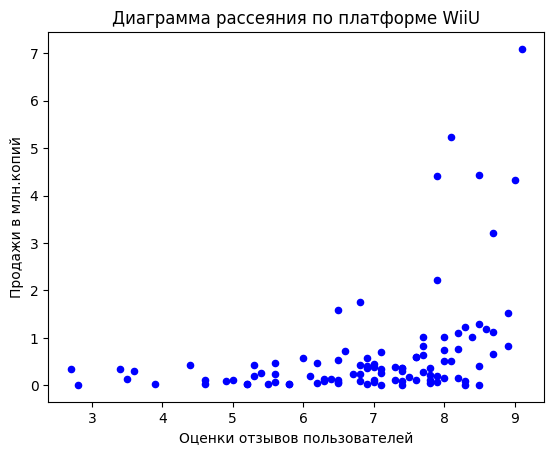

critic_score    0.34838
total_sales     1.00000
Name: total_sales, dtype: float64

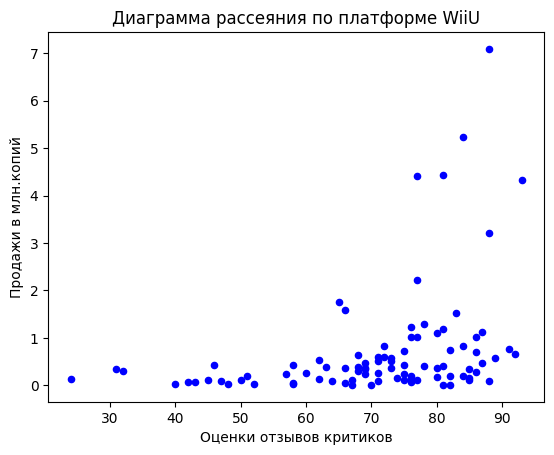

Расчет по Платформе X360


user_score     0.006164
total_sales    1.000000
Name: total_sales, dtype: float64

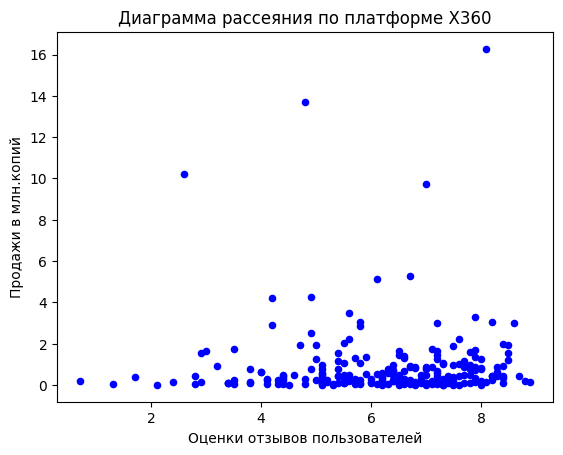

critic_score    0.360573
total_sales     1.000000
Name: total_sales, dtype: float64

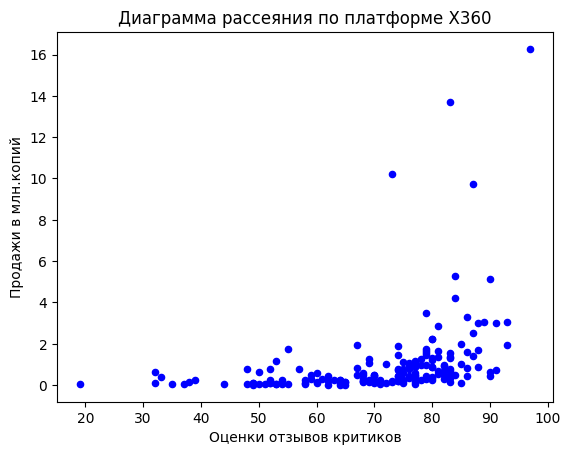

Расчет по Платформе XOne


user_score    -0.068925
total_sales    1.000000
Name: total_sales, dtype: float64

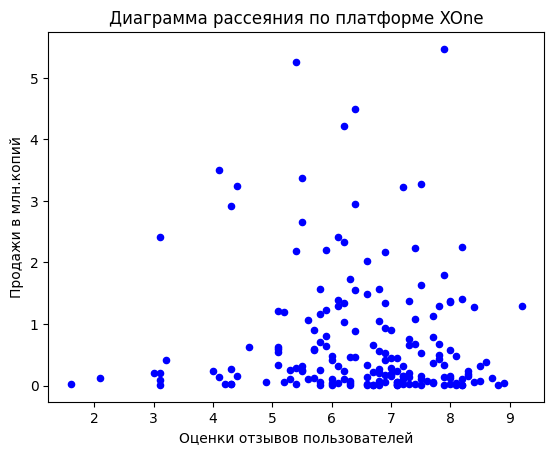

critic_score    0.416998
total_sales     1.000000
Name: total_sales, dtype: float64

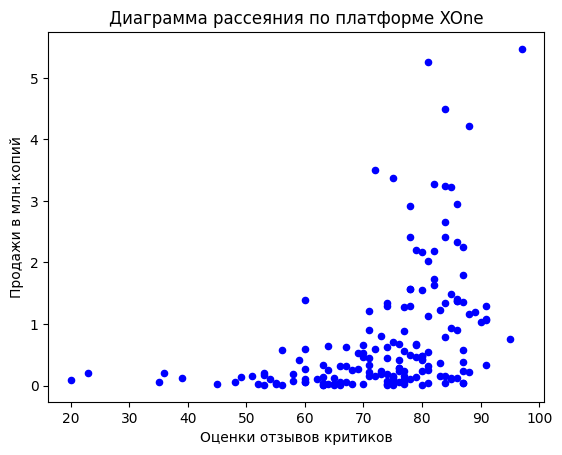

In [48]:

import matplotlib.pyplot as plt
df_sc, y = games_actual.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[games_on_pl['user_score'].notna() == True])
    not_critic = len(games_on_pl[games_on_pl['critic_score'].notna() == True])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl.plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl.plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

<a id="part3-6"></a>
### Распределение по жанрам

Проверим как влияют жанры игр на продажи

In [36]:
temp1, temp2 = games_actual.total_sales.sum(), games[games.year_of_release >= 2012].total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1446.5200000000002, 1446.5200000000002, 0.0)

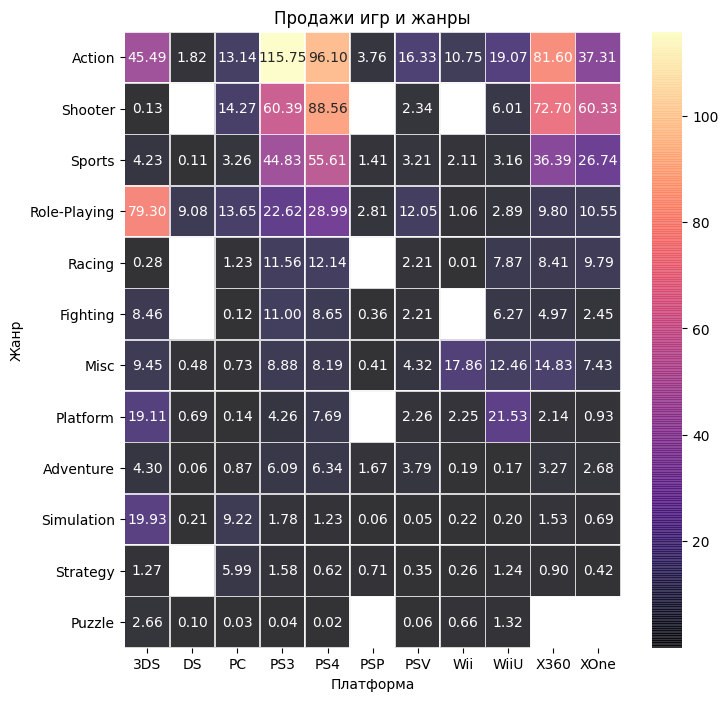

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.06
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


In [37]:
sales_and_genres = games_actual.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='sum', margins=False).sort_values(by='PS4', ascending=False)
plt.figure(figsize=(8, 8))

sns.heatmap(sales_and_genres, annot=True, linewidths=.5, cmap='magma',fmt = '0.2f', alpha=.8)

plt.title('Продажи игр и жанры')
plt.ylabel('Жанр')
plt.xlabel('Платформа')
plt.show();

display(games_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False))

Выводы:
* Самые прибыльные жанры - Экшн, Шутер и Ролевые игры.
* Самые популярные жанры у всех платформ разные:
    * 3DS популярнее всего ролевые игры (вероятно за счет покемонов, которые в топ-3 продаж в таблице выше)
    * На платформах Microsoft популярнее всего шутеры
    * На платформах Sony популярнее всего экшены
    * На WiiU поулярнее всего платформеры
* Необычно что на ПК с его мышью и клавиатурой продажи шутеров в 4 раза меньше, чем на иксбоксе у которого геймпад.
* Как мы выяснили выше, на такой отрыв конкретных жанров на некоторых платформах влияют мастадонты вроде GTA5, COD, Pokemon и.т.д
* У приставок Нинтендо продажи по жанрам немного отличаются от других. Игроки на этих платформах больше других любят платформеры. А игроки 3DS ко всему прочему больше других любят симуляторы и ролевые игры.
* Самые непопулярные жанры это Головоломки, Стратегии и Приключенческие игры.

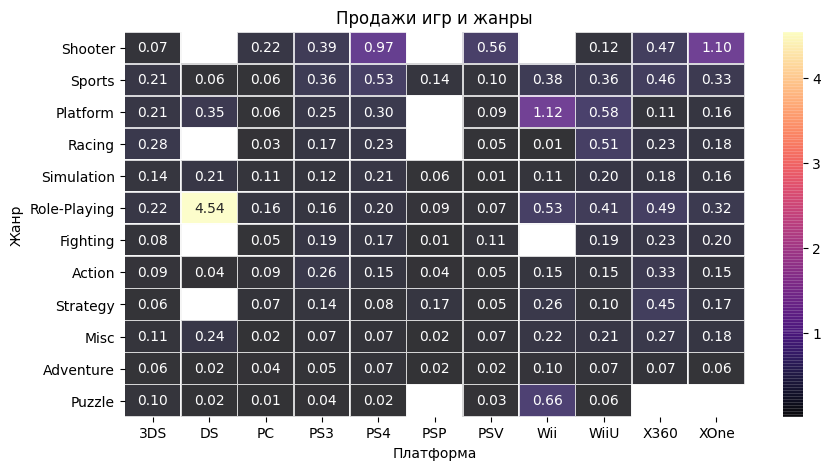

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


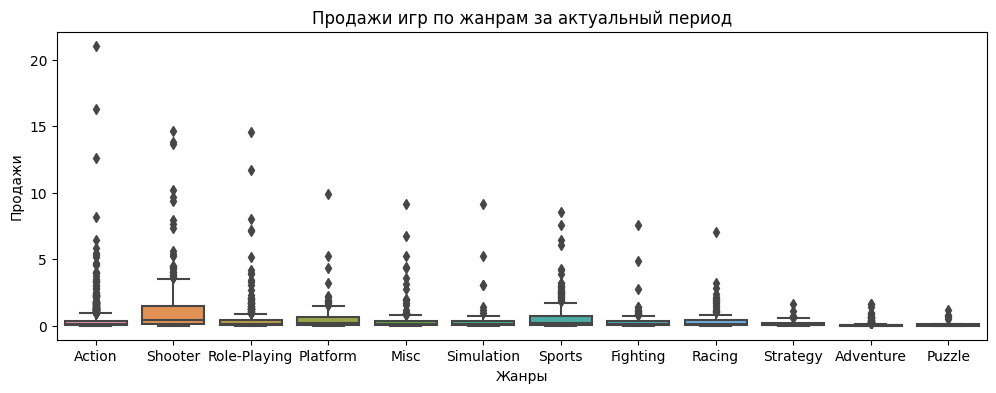

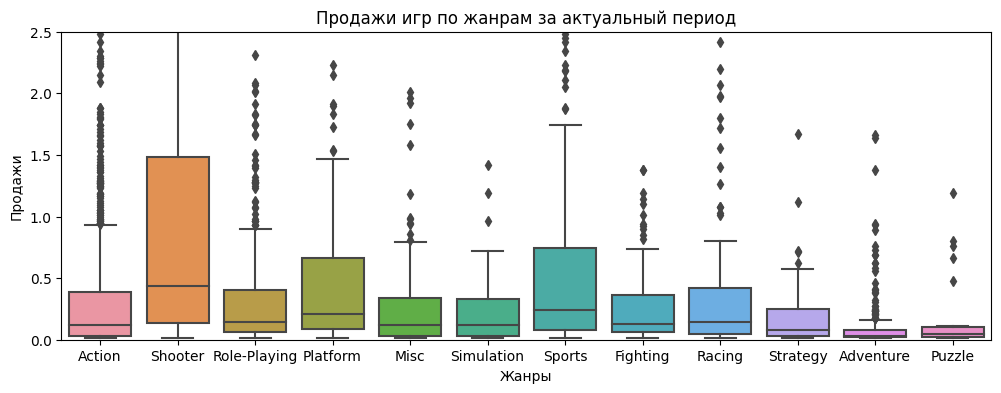

In [38]:
sales_and_genres_median = games_actual.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='median', margins=False).sort_values(by='PS4', ascending=False)

plt.figure(figsize=(10, 5))
sns.heatmap(sales_and_genres_median, annot=True, linewidths=.5, cmap='magma',fmt = '0.2f', alpha=.8)
plt.title('Продажи игр и жанры')
plt.ylabel('Жанр')
plt.xlabel('Платформа')
plt.show();



display(games_actual.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False))

plt.figure(figsize=(12,4))
ax = sns.boxplot(data=games_actual, x='genre', y='total_sales')
ax.set_ylabel('Продажи')
ax.set_xlabel('Жанры')
ax.set_title('Продажи игр по жанрам за актуальный период')
plt.show()

plt.figure(figsize=(12,4))
ax = sns.boxplot(data=games_actual, x='genre', y='total_sales')
ax.set_ylim(0, 2.5)
ax.set_ylabel('Продажи')
ax.set_xlabel('Жанры')
ax.set_title('Продажи игр по жанрам за актуальный период')
plt.show()

Если "убрать из уравнения" мастодонтов продаж и посмотреть, какие жанры популярнее всего в целом, то открывается следующая картина:
* Самые непопулярные жанры не меняются
* Шутер - самый выгодный жанр в целом.
* Остальные лидеры суммарных продаж - Ролевые игры и Экшн уступают по медианным продажам Спортивным играм и Платформерам.

<a id="part4"></a>
## Портреты пользователей по регионам
<a id="part4-1"></a>
### Самые популярные платформы и жанры

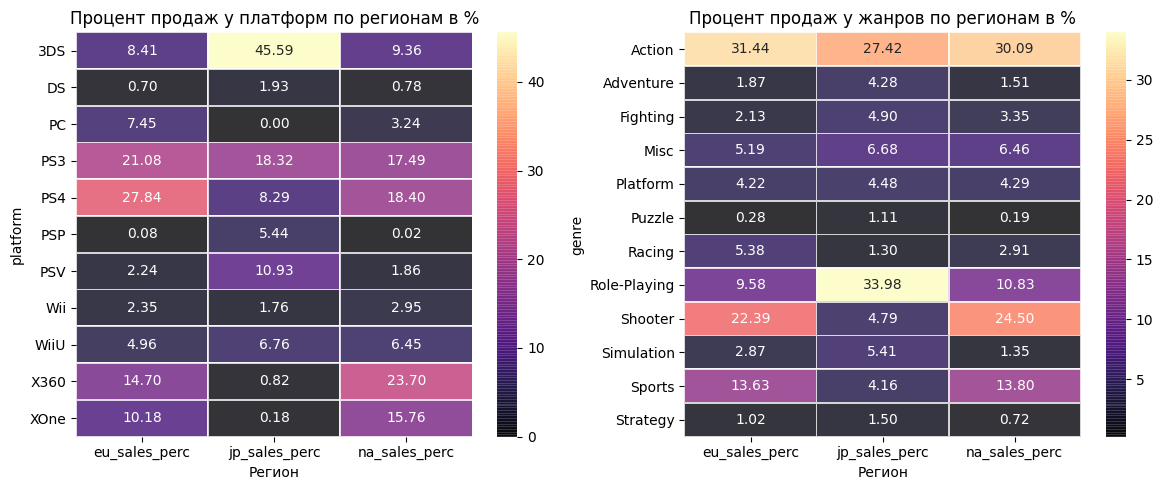

In [39]:
#Создаю сводные таблицы для графиков
games_sales_ter = games_actual.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc =  'sum')
games_sales_gen = games_actual.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc =  'sum')

#Перевожу сумму в проценты
for name, value in games_sales_ter.iteritems():
    games_sales_ter[name+'_perc'] = round((games_sales_ter[name] /
                       games_sales_ter[name].sum()) * 100, 2)
    
for name, value in games_sales_gen.iteritems():
    games_sales_gen[name+'_perc'] = round((games_sales_gen[name] /
                       games_sales_gen[name].sum()) * 100, 2)

#Убираю столбцы которые не процентные
games_sales_ter = games_sales_ter.drop(['na_sales', 'eu_sales', 'jp_sales'], axis=1)
games_sales_gen = games_sales_gen.drop(['na_sales', 'eu_sales', 'jp_sales'], axis=1)

#Строю график 2 в 1
fig, ax = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth (12)

sns.heatmap(games_sales_ter, annot=True, linewidths=.5, cmap='magma',fmt = '0.2f', alpha=.8, ax=ax[0])
sns.heatmap(games_sales_gen, annot=True, linewidths=.5, cmap='magma',fmt = '0.2f', alpha=.8, ax=ax[1])

ax[0].title.set_text("Процент продаж у платформ по регионам в %")
ax[1].title.set_text("Процент продаж у жанров по регионам в %")
ax[0].set_xlabel("Платформа")
ax[0].set_xlabel("Регион")
ax[1].set_xlabel("Жанр")
ax[1].set_xlabel("Регион")

fig.tight_layout()
plt.show();

Для пользователей из Европы.
* Топ-5 платформ: PS4, XOne, 3DS, PC, WiU 
* Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Racing
* Топ жанров совпадает с общим за исключением того, что на пятом месте платформеры а не гонки. Хbox полностью проигрывает PS4 в Европе. Также тут наибольшая популярность у игр на персональные компьютеры.
<br>
<br>
Для пользователей из Японии.
* Топ-5 платформ: 3DS, PSV, PS4, WiU, XOne
* Топ-5 жанров: Role-Playing, Action, Misc, Simulation, Fighting
* Япония сильно отличается от остального мира по предпочитаемым жанрам - даже экшн тут уступает первое место ролевым играм. Касаемо платформ японцы - яростные патриоты и предпочитают строго японские платформы, особенно от Nintendo. Еще они явно предпочитают портативные игровые устроиства стационарным, и в Японии популярностью пользуется жанр "прочие" - Вероятно это всевозможные эксклюзивные для рынка Японии игры.
<br>
<br>
Для пользователей из Северной Америки.
* Топ-5 платформ: PS4, XOne, 3DS, WiiU,  PC
* Топ-5 жанров: Action, Shooter,  Sports, Role-Playing, Misc
* Необычно, что в Америке более популярна японская платформа чем американская. Топ жанров совпадает с Европейским, за исключением того, что спортивные и ролевые игры поменялись местами.

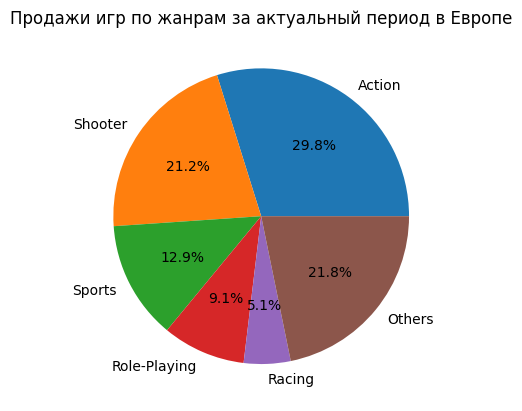

In [40]:
top5_genres_eu = games_actual.pivot_table(index='genre', values ='eu_sales', aggfunc =  'sum').sort_values(by='eu_sales', ascending=False).reset_index()
others = top5_genres_eu.loc[4:]['eu_sales'].sum()
top5_genres_eu = top5_genres_eu.head(5)
top5_genres_eu.loc[5] = ['Others', others]

fig1, ax = plt.subplots()
ax.pie(top5_genres_eu['eu_sales'], labels=top5_genres_eu['genre'], autopct='%1.1f%%')
ax.set_title('Продажи игр по жанрам за актуальный период в Европе')
plt.show()

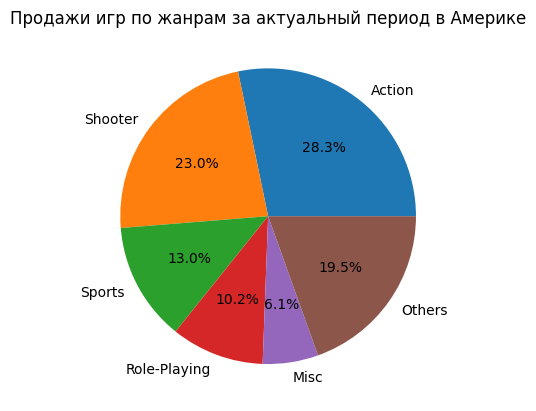

In [41]:
top5_genres_na = games_actual.pivot_table(index='genre', values ='na_sales', aggfunc =  'sum').sort_values(by='na_sales', ascending=False).reset_index()
others = top5_genres_na.loc[4:]['na_sales'].sum()
top5_genres_na = top5_genres_na.head(5)
top5_genres_na.loc[5] = ['Others', others]

fig1, ax = plt.subplots()
ax.pie(top5_genres_na['na_sales'], labels=top5_genres_na['genre'], autopct='%1.1f%%')
ax.set_title('Продажи игр по жанрам за актуальный период в Америке')
plt.show()

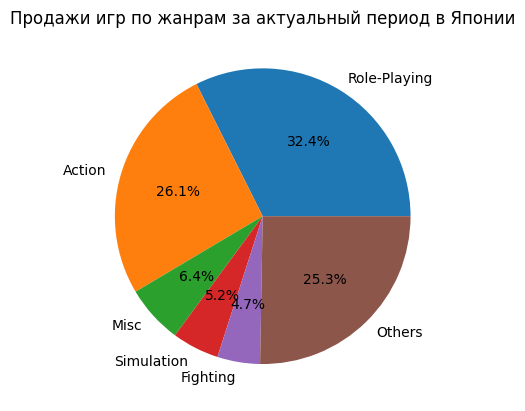

In [42]:
top5_genres_jp = games_actual.pivot_table(index='genre', values ='jp_sales', aggfunc =  'sum').sort_values(by='jp_sales', ascending=False).reset_index()
others = top5_genres_jp.loc[4:]['jp_sales'].sum()
top5_genres_jp = top5_genres_jp.head(5)
top5_genres_jp.loc[5] = ['Others', others]

fig1, ax = plt.subplots()
ax.pie(top5_genres_jp['jp_sales'], labels=top5_genres_jp['genre'], autopct='%1.1f%%')
ax.set_title('Продажи игр по жанрам за актуальный период в Японии')
plt.show()

</font><font color='Blue'><b>Добавил графики</b></font><br>

<a id="part4-2"></a>
### Влияние рейтинга ESRB на продажи

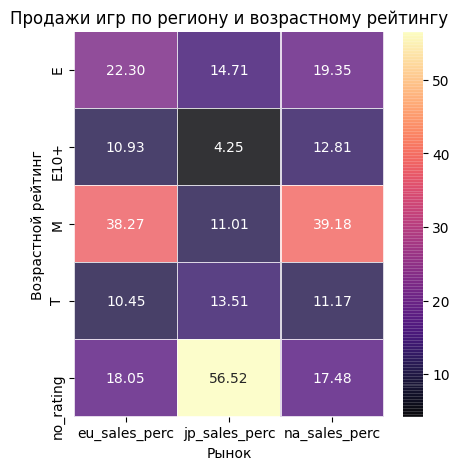

In [43]:
games_sales_rtg = games_actual.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc =  'sum')

for name, value in games_sales_rtg.iteritems():
    games_sales_rtg[name+'_perc'] = round((games_sales_rtg[name] /
                       games_sales_rtg[name].sum()) * 100, 2)

games_sales_rtg = games_sales_rtg.drop(['na_sales', 'eu_sales', 'jp_sales'], axis=1)


plt.figure(figsize=(5, 5))

sns.heatmap(games_sales_rtg, annot=True, linewidths=.5, cmap='magma',fmt = '0.2f', alpha=.8)

plt.title('Продажи игр по региону и возрастному рейтингу')
plt.ylabel('Возрастной рейтинг')
plt.xlabel('Рынок')
plt.show();

В Европе и Северной Америке показатели схожи: популярнее всего игры 17+. В Японии есть свои рейтинговые агенства поэтому у ESRB большинство игр для этого региона не оценены (Вероятно оценки есть только у игр, которые выходили и в других регионах).

<a id="part5"></a>
## Проверка Гипотез

Необходимо проверить две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
<br><br>
Начну с первой
<br><br>
Для сравнения двух генеральных совокупностей я буду использовать метод scipy.stats.ttest_ind - именно он позволит проверить гипотезу об их равенстве среднего. Соответственно нулевые гипотезы у меня будут удтверждать что они равны. p-value выберу стандартный в 5%.

<a id="part5-1"></a>
### Рейтинги XOne и PC

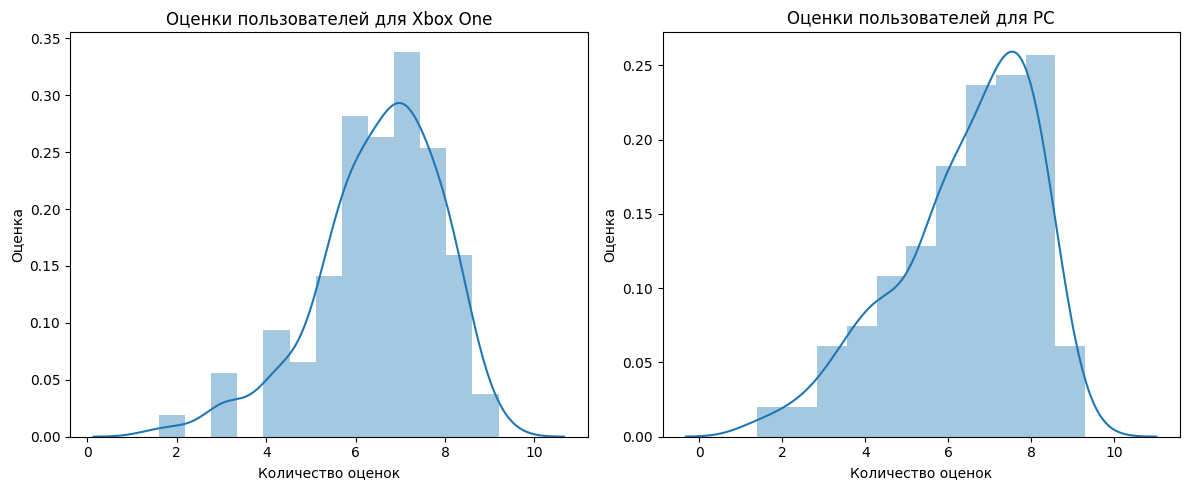

In [44]:
XOne = games_actual.query('platform == "XOne"').reset_index(drop=True)['user_score'].dropna()
PC = games_actual.query('platform == "PC"').reset_index(drop=True)['user_score'].dropna()

fig, ax = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth (12)

sns.distplot(XOne, ax=ax[0])
sns.distplot(PC, ax=ax[1])

ax[0].title.set_text("Оценки пользователей для Xbox One")
ax[1].title.set_text("Оценки пользователей для PC")
ax[0].set_xlabel("Количество оценок")
ax[1].set_xlabel("Количество оценок")
ax[0].set_ylabel("Оценка")
ax[1].set_ylabel("Оценка")
fig.tight_layout()
plt.show();

Судя по графикам, оценки ПК более высокие, лучше сгруппированны и их меньше, однако кривые распределения схожи. Чтобы это проверить, сформулирую гипотезу:
<br>
<br>
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
Н1: Средние пользовательские рейтинги платформ Xbox One и PC разные<br>
<br>
Уровень значимости α = 0.05
Если Pvalue будет меньше этого уровня значимости, то нулевая гипотеза будет отвергнута

Для проверки буду использовать ttest_ind

In [45]:
alpha = .05
results = st.ttest_ind(XOne, PC)
print('p-значение: ', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


В самом деле, статистически значимых различий в оценках пользователей для этих двух жанров нет. Нулевую гипотезу нельзя отвергнуть.

<a id="part5-2"></a>
### Рейтинги Action и Sports

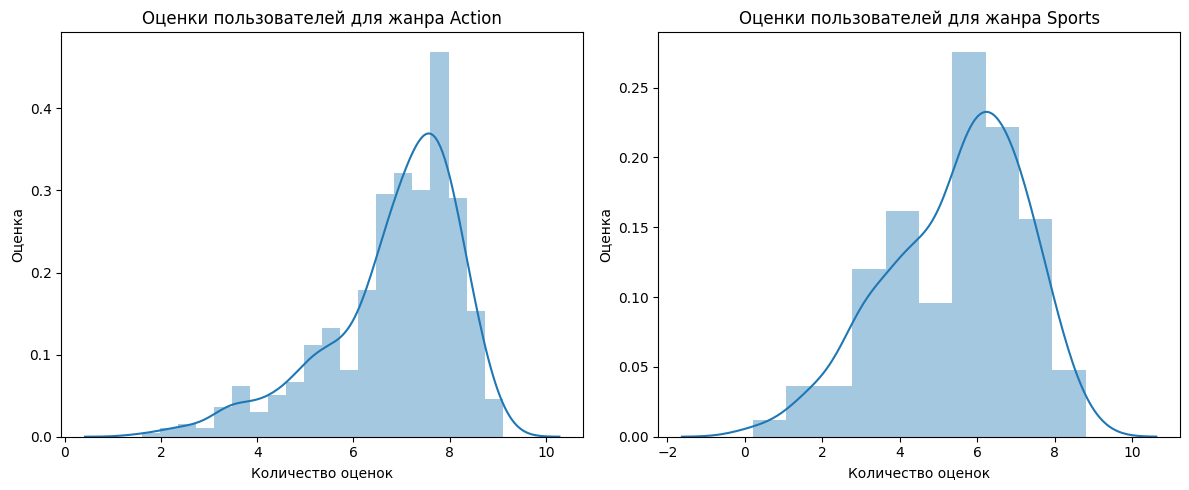

In [46]:
Action_score = games_actual.query('genre == "Action"').reset_index(drop=True)['user_score'].dropna()
Sports_score = games_actual.query('genre == "Sports"').reset_index(drop=True)['user_score'].dropna()

fig, ax = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth (12)

sns.distplot(Action_score, ax=ax[0])
sns.distplot(Sports_score, ax=ax[1])

ax[0].title.set_text("Оценки пользователей для жанра Action")
ax[1].title.set_text("Оценки пользователей для жанра Sports")
ax[0].set_xlabel("Количество оценок")
ax[1].set_xlabel("Количество оценок")
ax[0].set_ylabel("Оценка")
ax[1].set_ylabel("Оценка")
fig.tight_layout()
plt.show();

Графики не похожи. Среди спортивных игр большая доля с оценками 4 и 3. Кривые распределения разные.
Сформулирую гипотезу:
<br>
<br>
H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.<br>
Н1: Средние пользовательские рейтинги жанров Action и Sports разные.
<br>
<br>
Уровень значимости α = 0.05 Если Pvalue будет меньше этого уровня значимости, то нулевая гипотеза будет отвергнута

In [47]:
alpha = .05
results = st.ttest_ind(Action_score, Sports_score)
print('p-значение: ', results.pvalue)    # тест двухсторонний
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.8045233804629176e-26
Отвергаем нулевую гипотезу


Присутствуют статистически значимые отличия, нулевая гипотеза отвергнута.

<a id="part6"></a>
## Выводы

* PS4 и XOne являются самыми перспективными платформами для продаж в 2017 году и только набирают свой рост. Игры на 3DS, PSV и Wii U в следующем году тоже будут продаваться, но роста от них ожидать не стоит.
* Оценки критиков если и влияют на продажи, то незначительно, а оценки игроков не влияют вовсе
* Самые стабильно прибыльные жанры это Шутеры, Спортивные игры и платформеры, Суммарные продажи лучше всего у Экшена, Шутеров и Ролевых игр.
* В Америке хорошо продаются игры для PS4 и XOne, в Европе лучше сконцентрироваться на PS4, а в японии на 3DS и PSV.
* В Европе и Северной Америке хорошо продаются игры 17+
* Было проверенно две гипотезы, вот их результаты:
	* Нельзя удтверждать, что оценки пользователей для игр на хбох и пк отличаются.
	* Оценки пользователей для игр жанров Экшн и Спортивные игры различны.
* Рекламный бюджет лучше потратить на игры, наиболее соответствующие нижеуказанным критериям:
    * Это игра для платформ PS4 и/или Xbox One
    * В жанре Шутер или Спортивная игра
    * С возрастным рейтингом 17+
    * Лучше рекламировать такую игру в Европе или Сеерной Америке
    * Отзывы критиков не должны быть ниже средних

[В начало](#start)